## 3. 一般化線形モデル(GLM)
### 3.1 例題：個体ごとに平均種子数が異なる場合
第2章の例題と似ているが、個体の大きさがさまざまであったり、あるいは植物たちを二つのグループに分けて、  
それぞれで異なる実験処理を施していたりする点で異なる。  
架空植物100個体の調査をして得られた、個体ごとの種子数のデータがあるとする。  
植物個体$i$の種子数は$y_i$個であり、体サイズ$x_i$が観測されている。  
さらに、全個体のうち50個体($i\in\{1,2,\cdots,50\}$)は何も処理していない(処理C)、  
残り50体($i\in\{51,52,\cdots,100\}$)には肥料を与える処理(施肥処理、処理T)を施す。

### 3.2 観測されたデータの概要を調べる

In [1]:
import pandas as pd

d = pd.read_csv('C:/Users/tanak/study/参考書/データ解析のための統計モデリング/kubobook_2012/data/data3a.csv')
d

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


In [2]:
d.dtypes

y      int64
x    float64
f     object
dtype: object

In [3]:
d.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


### 3.3 統計モデリングの前にデータを図示する
視覚的に把握するためにも、いろいろな図にしてよく見ることは大事である。

Text(0, 0.5, 'y')

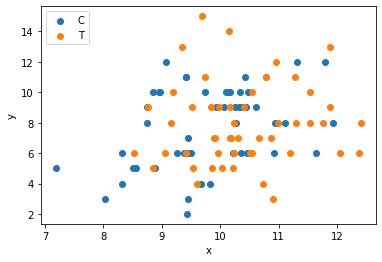

In [82]:
import matplotlib.pyplot as plt

for s in ['C', 'T']:
    d_select = d[d['f']==s]
    plt.scatter(d_select['x'], d_select['y'], label=s)
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')

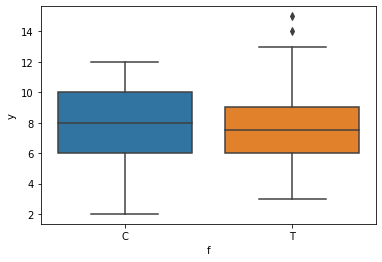

In [5]:
import seaborn as sns

sns.boxplot(x='f', y='y', data=d);

### 3.4 ポアソン回帰の統計モデル
最初に個体$i$の体サイス$x_i$だけに依存する統計モデルについて考える。  
説明変数は$x_i$で、応答変数は種子数$y_i$である。$f_i$はとりあえず無視する。  
ある個体$i$において種子数$y_i$である確率$p(y_i|\lambda_i)$はポアソン分布に従っていて、
$$
p(y_i|\lambda_i)=\frac{\lambda_i^{y_i}\exp{(-\lambda_i)}}{y_i!}
$$
と仮定する。  
  
個体ごとに異なる平均$\lambda_i$を説明変数$x_i$の関数として定義する。  
ここでは、ある個体$i$の平均種子数$\lambda_i$が、
$$
\lambda_i=\exp{(\beta_1+\beta_2x_i)}
$$
であるとする。  
$\beta_1$や$\beta_2$をパラメータと呼び、とりあえず$\beta_1$を切片、$\beta_2$を傾きと呼ぶことにする。  
ここで$\lambda_i=\exp{(\beta_1+\beta_2x_i)}$を図示すると。

Text(0, 0.5, 'lambda')

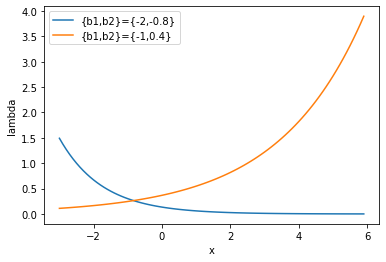

In [83]:
import numpy as np

def lmd(x, b1, b2):
    return np.exp(b1+b2*x)

x = np.arange(-3,6,0.1)

plt.plot(x, lmd(x, -2, -0.8), label='{b1,b2}={-2,-0.8}');
plt.plot(x, lmd(x, -1,  0.4), label='{b1,b2}={-1,0.4}');
plt.legend();
plt.xlabel('x')
plt.ylabel('lambda')

このモデルの平均種子数$\lambda_i$の式は、
$$
\log{\lambda_i}=\beta_1+\beta_2x_i
$$
と変形できる。  
このとき右辺の$\beta_1+\beta_2x_i$は**線形予測子**と呼ばれる。($\beta_1$と$\beta_2$の線形結合)  
上の式は、$\log{\lambda_i}=(線形予測子)$となっているが、左辺の関数は**リンク関数**と呼ばれる。  
今回の場合は、対数関数が指定されているため、**対数リンク関数**と呼ばれる。  
ポアソン回帰をする場合、たいていは対数リンク関数を使用する。  
また、数学的によい性質があるので、ポアソン分布・二項分布の**正準リンク関数**と呼ぶ。  
  
ポアソン回帰とは、観測データに対するポアソン分布を使った統計モデルのあてはめであり、  
この統計モデル対数尤度$\log{L}$が最大になるパラメータ$\hat{\beta}_1$と$\hat{\beta}_2$の推定値を決めることである。  
データ$\boldsymbol{Y}$のもとでの、このモデルの対数尤度は、
$$
\log{L}(\beta_1,\beta_2)=\sum_i\log{\frac{\lambda_i^{y_i}\exp{(-\lambda_i)}}{y_i!}}
$$
となり、$\lambda_i$は$\beta_1$と$\beta_2$の関数であることに注意する。

In [88]:
import statsmodels.api as sm

model = sm.GLM(d.y, sm.add_constant(d.x), family=sm.families.Poisson())
#model.fit_regularized(method='elastic_net', alpha=1.0, L1_wt=0.0) # 正則化
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sat, 07 May 2022   Deviance:                       84.993
Time:                        13:04:50   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [85]:
# sklearnでも用意されている
from sklearn.linear_model import PoissonRegressor

glm = PoissonRegressor(
                        alpha=0,  # ペナルティ項
                        fit_intercept=True,  # 切片
                        max_iter=100,  # ソルバーの試行回数
                      )
glm.fit(d.x.values.reshape(-1, 1), d.y.values.reshape(-1, 1))

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


PoissonRegressor(alpha=0)

In [86]:
print(glm.coef_ )
print(glm.intercept_  )

[0.07566189]
1.2917210225621196


constは切片$\beta_1$、説明変数$x$の係数は傾き$\beta_2$に対応している。  
std errorはパラメータの標準誤差の推定値で、**標準誤差(SE)**とは推定値$\beta_1$と$\beta_2$のばらつきを標準偏差で表したものである。  
簡単に「同じ調査方法で同数の別データをとりなおしたときのばらつき具合」ということにする。  
zはz値と呼ばれる統計量であり、最尤推定値をSEで除した値である。  
これにより、Wald信頼区間というものが構成できて、推定値がゼロから十分に離れているかの荒い目安となる。  
P>|z|は、この値(確率)が大きいほどz値がゼロに近くなり、$\hat{\beta_1}$と$\hat{\beta_2}$がゼロに近いことを表現する。  
  
ある説明変数をモデルに含めるべきか否かといった判断は、Wald信頼区間ではなく、4章で説明するモデル選択を使用するほうが良いかもしれない。  
モデル選択はより良い選択をする統計モデルを探し出すもので、当てはまりの改善ではなく、予測の改善を目的としているからである。  
  
ここで、**最大対数尤度**を**当てはまりの良さ**と呼ぶ。  
このモデルの最大対数尤度は-235.4ということがわかる。  
  
ここで、ポアソン回帰の結果を図示する。

Text(0, 0.5, 'y')

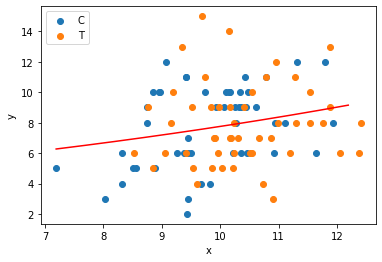

In [89]:
xx = np.arange(np.min(d.x), np.max(d.x), 0.5)
yy = result.predict(sm.add_constant(xx))

for s in ['C', 'T']:
    d_select = d[d['f']==s]
    plt.scatter(d_select['x'], d_select['y'], label=s)
plt.plot(xx, yy, '-', color='red')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')

### 3.5 説明変数がカテゴリ変数の統計モデル
カテゴリ変数はダミー変数に置き換えてあつかう。  
施肥効果$f_i$だけが影響するモデルの平均値を、
$$
\lambda_i=\exp{(\beta_1+\beta_3d_i)}
$$

として、$\beta_1$は切片、$\beta_3$は施肥の効果を表す。  
ここで、$d_i$は以下のような値をとるダミー変数である。
$$
d_i=\left\{
\begin{array}{11}
0\ (f_i=C)\\
1\ (f_i=T)
\end{array}
\right.
$$

個体$i$が肥料なし($f_i=C$)の場合、
$$
\lambda_i=\exp{(\beta_1)}
$$

個体$i$が施肥処理をした($f_i=T$)、
$$
\lambda_i=\exp{(\beta_1+\beta_3)}
$$
となる。

In [11]:
d.loc[d['f']=='C', 'f_dummy'] = 0
d.loc[d['f']=='T', 'f_dummy'] = 1

model = sm.GLM(d.y, sm.add_constant(d.f_dummy), family=sm.families.Poisson())
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sat, 07 May 2022   Deviance:                       89.475
Time:                        09:51:41   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000       1.952       2.151
f_dummy        0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

個体$i$が肥料なし($f_i=C$)の場合、
$$
\lambda_i=\exp{(2.05+0)}=\exp{(2.05)}=7.77
$$

個体$i$が施肥処理をした($f_i=T$)、
$$
\lambda_i=\exp{(2.05+0.0128)}=\exp{(2.0628)}=7.87
$$
となり、肥料をやると平均種子数は少しだけ増えると予測される。  
最大対数尤度は-237.63と$x_i$だけのモデルより当てはまりが悪くなっている。

### 3.6 説明変数が数量型+カテゴリ型の統計モデル
体サイズ$x_i$と施肥効果$f_i$の複数の説明変数を同時に組み込んだ統計モデルを作る。  
$$
\log{\lambda_i}=\beta_1+\beta_2x_i+\beta_3d_i
$$


In [44]:
model1 = sm.GLM(d.y, sm.add_constant(d[['x', 'f_dummy']]), family=sm.families.Poisson())
result1 = model1.fit()

result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sat, 07 May 2022   Deviance:                       84.808
Time:                        10:02:17   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
f_dummy       -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

$f_i$だけのモデルでは効果(係数)がプラスであったが、このモデルではマイナスとなっている。  
最大対数尤度に関しては、$x_i$だけのモデルと比較すると、少しだけ当てはまりがよくなっている。

「対数kリンク関数では要因の効果が積で表される」という性質を持つ。  
個体$i$が肥料なし($f_i=C$)の場合、
$$
\lambda_i=\exp{(1.26+0.08x_i)}
$$

個体$i$が施肥処理をした($f_i=T$)、
$$
\lambda_i=\exp{(1.26+0.08x_i-0.032)}
$$
となり、以下のように分解できる。
$$
\begin{align}
\lambda_i&=\exp{(1.26)}\exp{(0.08x_i)}\exp{(-0.032)}\\
=&(定数)×(サイズの効果)×(施肥処理の効果)
\end{align}
$$

サイズ$x_i$について「説明変数$x_i$が1増加すると、$\lambda\_i$は$\exp{(0.08×1)}=1.08$倍に増える」と予測される。  
施肥$f_i$については「説明変数$d_i$が1の場合、$\lambda\_i$は$\exp{(-0.032×1)}=0.969$倍になる」と予測される。  
  
ここで、平均が線形予測子に等しい**恒等リンク関数**を使ってポアソン回帰を行ってみる。

In [45]:
model2 = sm.GLM(d.y, sm.add_constant(d[['x', 'f_dummy']]), family=sm.families.Poisson(link=sm.genmod.families.links.identity))
result2 = model2.fit()

result2.summary()

<ipython-input-45-159206de8ef3>:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  model2 = sm.GLM(d.y, sm.add_constant(d[['x', 'f_dummy']]), family=sm.families.Poisson(link=sm.genmod.families.links.identity))
C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Sat, 07 May 2022   Deviance:                       84.538
Time:                        10:02:26   Pearson chi2:                     83.6
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2671      2.843      0.446      0.656      -4.306       6.840
x              0.6606      0.290      2.281      0.023       0.093       1.228
f_dummy       -0.2048      0.582     -0.352      0.725      -1.346       0.936
==============================================================================
"""

Text(0.5, 1.0, 'identity link')

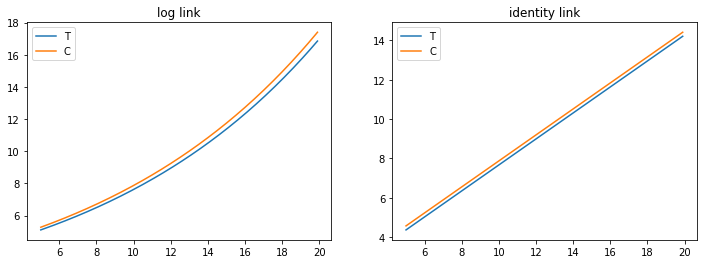

In [90]:
x = np.arange(5, 20, 0.1)

def pred(x, d, result):
    xx = sm.add_constant(x)
    dd = np.array([d]*len(xx))
    X = pd.DataFrame(np.concatenate([xx.reshape(-1,2),dd.reshape(-1,1)], axis=1))
    y_pred = result.predict(X)
    return y_pred

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, pred(x, 1, result1), label='T');
ax1.plot(x, pred(x, 0, result1), label='C');
ax1.legend()
ax1.set_title('log link')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, pred(x, 1, result2), label='T');
ax2.plot(x, pred(x, 0, result2), label='C');
ax2.legend()
ax2.set_title('identity link')

## 3.7 「何でも正規分布」「何でも直線」には無理がある
GLMにおいて、恒等リンク関数を指定すると、一般化ではない**線形モデル**あるいは**一般線形モデル**と呼ばれる。  
**直線回帰**はLMのあてはめのひとつである。  
直線回帰はGLMの一部であり、統計モデルの特徴は以下のようになる。
- 観測値{$x_1,x_2,\cdots,x_n$}と{$y_1,y_2,\cdots,y_n$}のペアがあり、$\boldsymbol{X}=\{ x_i\}$を説明変数、$\boldsymbol{Y}=\{ y_i\}$を応答変数と呼ぶ。
- $\boldsymbol{Y}$は平均$\mu_i$で標準偏差$\sigma$の正規分布に従う
- あるデータ点$i$において平均値が$\mu_i=\beta_1+\beta_2x_i$となる

今回の例のように応答変数がカウントデータだったとすると、以下のような疑問点が生じる。
- 正規分布は連続的な値を扱う確率分布だったはずでは？
- カウントデータなのに平均値の予測がマイナスになる理由は？
- 図で見ると「ばらつき一定」ではなさそうなのに、分散一定を仮定？

このように直線回帰の統計モデルは「現実ばなれ」している。  
これに対してポアソン分布を使ったGLMでは、上に挙げた問題点は、
- ポアソン分布を使っているのでカウントデータに正しく対応
- 対数リンク関数を使えば平均値は常に非負
- $y$のばらつきは平均とともに増大する
  
のようにうまく解決できるように見える。  
また、応答変数を対数変換して直線回帰することと、ポアソン回帰はまったく別物であることに注意する。

In [18]:
model_poisson = sm.GLM(d.y, sm.add_constant(d[['x', 'f_dummy']]), family=sm.families.Poisson())
result_poisson = model_poisson.fit()

result_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sat, 07 May 2022   Deviance:                       84.808
Time:                        09:53:19   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
f_dummy       -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

In [76]:
model_linear = sm.OLS(np.log(d.y), sm.add_constant(d[['x', 'f_dummy']]))
result_linear = model_linear.fit()

result_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.465
Date:                Sat, 07 May 2022   Prob (F-statistic):             0.0352
Time:                        10:17:03   Log-Likelihood:                -38.853
No. Observations:                 100   AIC:                             83.71
Df Residuals:                      97   BIC:                             91.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0201      0.373      2.737      0.007       0.280       1.760
x              0.0981      0.038      2.605      0.011       0.023       0.173
f_dummy       -0.0280      0.076     -0.370      0.712      -0.178       0.122
==============================================================================
Omnibus:                        9.268   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.210
Skew:                          -0.635   Prob(JB):                       0.0100
Kurtosis:                       3.775   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

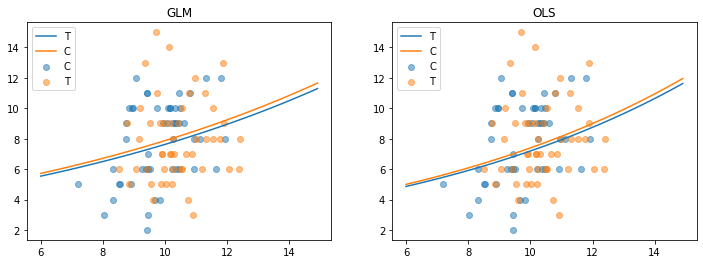

In [80]:
x = np.arange(6, 15, 0.1)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1, 2, 1)
for s in ['C', 'T']:
    d_select = d[d['f']==s]
    ax1.scatter(d_select['x'], d_select['y'], label=s, alpha=.5)
ax1.plot(x, pred(x, 1, result_poisson), label='T');
ax1.plot(x, pred(x, 0, result_poisson), label='C');
ax1.set_title('GLM')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
for s in ['C', 'T']:
    d_select = d[d['f']==s]
    ax2.scatter(d_select['x'], d_select['y'], label=s, alpha=.5)
ax2.plot(x, np.exp(pred(x, 1, result_linear)), label='T');
ax2.plot(x, np.exp(pred(x, 0, result_linear)), label='C');
ax2.set_title('OLS')
ax2.legend()